# Q1
1) Delivery_time -> Predict delivery time using sorting time 

In [2]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading file
dt=pd.read_csv("delivery_time.csv")
dt.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
dt.columns="DeliveryTime","SortingTime"

In [5]:
dt.shape

(21, 2)

In [6]:
dt

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [7]:
# there are no null values in the data

In [8]:
# describing the data
dt.describe()

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1f60260cfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f602618670>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f60260cd00>,
 'medians': [<matplotlib.lines.Line2D at 0x1f602618b50>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f602618e20>,
 'means': []}

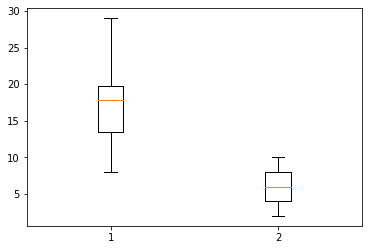

In [9]:
# visualizing the data
plt.boxplot(dt)

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

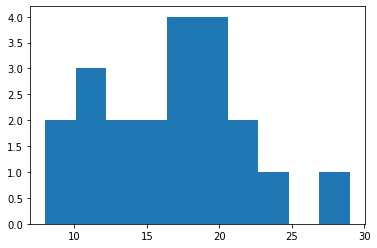

In [10]:
plt.hist(dt['DeliveryTime'])

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

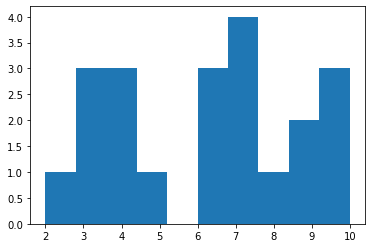

In [11]:
plt.hist(dt['SortingTime'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


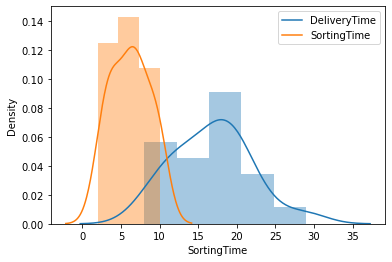

In [12]:
sns.distplot(dt['DeliveryTime'])
sns.distplot(dt['SortingTime'])
plt.legend(['DeliveryTime','SortingTime'])

In [13]:
# There are no outliers in the data

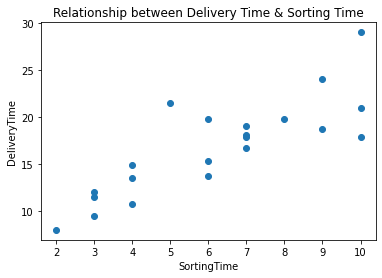

In [14]:
# scattrer plot to identify the relationship b/w variables
plt.scatter(dt['SortingTime'],dt['DeliveryTime'])
plt.title("Relationship between Delivery Time & Sorting Time")
plt.xlabel("SortingTime")
plt.ylabel("DeliveryTime")
plt.show()


Text(0, 0.5, 'DeliveryTime')

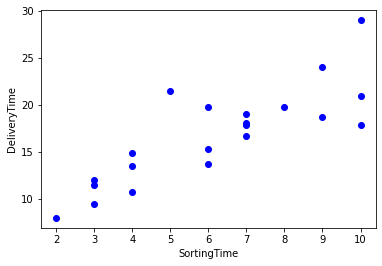

In [15]:
plt.plot(dt.SortingTime,dt.DeliveryTime,"bo")
plt.xlabel("SortingTime")
plt.ylabel("DeliveryTime")

In [16]:
# Identifying the correlation b/w variables
dt.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


In [17]:
#X = dt[["SortingTime"]]
#X

In [18]:
#Y = dt["DeliveryTime"]
#Y

In [19]:
# applying linear regression model
import statsmodels.formula.api as smf
model=smf.ols("DeliveryTime~SortingTime", data=dt).fit()
model

In [20]:
# finding coefficients
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [21]:
# finding metrics of model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           3.98e-06
Time:                        00:52:54   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [23]:
model.resid_pearson

array([-0.70630355,  0.10943679,  1.11524837,  0.87774154,  2.01950985,
       -0.383949  ,  0.2978383 , -0.69160484, -1.76255624, -0.9110735 ,
        0.01877637, -0.82756157, -0.49264758, -0.0101515 ,  0.17043364,
        0.5796396 , -0.92911167, -0.00540844, -0.64082979, -0.10081191,
        2.27338512])

In [24]:
print(model.conf_int(0.05))

                    0          1
Intercept    2.979134  10.186334
SortingTime  1.108673   2.189367


In [25]:
# finding predicted values
pred = model.predict(dt.SortingTime)
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [26]:
# finding RMSE - Root Mean Square Error
rmse_lin = np.sqrt(np.mean((np.array(dt['DeliveryTime'])-np.array(pred))**2))
rmse_lin 

2.7916503270617654

Text(0, 0.5, 'DeliveryTime')

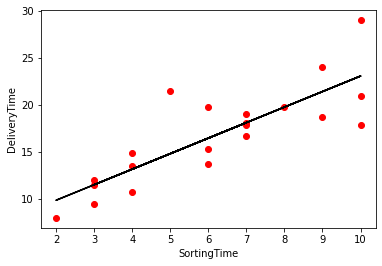

In [27]:
import matplotlib.pylab as plt
plt.scatter(x=dt['SortingTime'],y=dt['DeliveryTime'],color='red')
plt.plot(dt['SortingTime'],pred,color='black')
plt.xlabel('SortingTime')
plt.ylabel('DeliveryTime')

In [28]:
# applying logerithmic transformation on independent variable
model2 = smf.ols('DeliveryTime~np.log(SortingTime)',data=dt).fit()
model2.params

Intercept              1.159684
np.log(SortingTime)    9.043413
dtype: float64

In [29]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           2.64e-06
Time:                        00:52:55   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(SortingTime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [31]:
model.resid_pearson

array([-0.70630355,  0.10943679,  1.11524837,  0.87774154,  2.01950985,
       -0.383949  ,  0.2978383 , -0.69160484, -1.76255624, -0.9110735 ,
        0.01877637, -0.82756157, -0.49264758, -0.0101515 ,  0.17043364,
        0.5796396 , -0.92911167, -0.00540844, -0.64082979, -0.10081191,
        2.27338512])

In [32]:
pred2 = model2.predict(pd.DataFrame(dt['SortingTime']))
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [33]:
rmse_log = np.sqrt(np.mean((np.array(dt['DeliveryTime'])-np.array(pred2))**2))
rmse_log 

2.733171476682066

In [34]:
pred2.corr(dt.DeliveryTime)

0.8339325279256244

Text(0, 0.5, 'DeliveryTime')

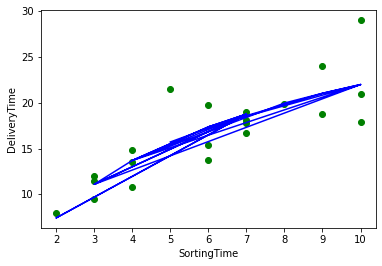

In [35]:
plt.scatter(x=dt['SortingTime'],y=dt['DeliveryTime'],color='green')
plt.plot(dt['SortingTime'],pred2,color='blue')
plt.xlabel('SortingTime')
plt.ylabel('DeliveryTime')

In [36]:
# applying logerithmic transformation on dependent variable
import statsmodels.formula.api as smf
model3 = smf.ols('np.log(DeliveryTime)~SortingTime',data=dt).fit()
model3.params

Intercept      2.121372
SortingTime    0.105552
dtype: float64

In [37]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.711
Model:                              OLS   Adj. R-squared:                  0.696
Method:                   Least Squares   F-statistic:                     46.73
Date:                  Fri, 21 Oct 2022   Prob (F-statistic):           1.59e-06
Time:                          00:52:56   Log-Likelihood:                 7.7920
No. Observations:                    21   AIC:                            -11.58
Df Residuals:                        19   BIC:                            -9.495
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
SortingTime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
model3.resid

0    -0.132365
1     0.059111
2     0.228472
3     0.106718
4     0.190408
5    -0.023566
6     0.084206
7    -0.186735
8    -0.292087
9    -0.140142
10    0.021411
11   -0.168672
12   -0.046023
13    0.004320
14    0.049377
15    0.156440
16   -0.133643
17    0.036231
18   -0.253034
19    0.020649
20    0.418923
dtype: float64

In [39]:
model3.resid_pearson

array([-0.75408795,  0.33675889,  1.3016092 ,  0.60797197,  1.08475764,
       -0.13425573,  0.47972269, -1.06383166, -1.66402537, -0.79839415,
        0.12198057, -0.9609301 , -0.26219179,  0.02461332,  0.28130094,
        0.89124014, -0.7613643 ,  0.20640995, -1.44153627,  0.11763994,
        2.38661208])

In [40]:
pred_log = model3.predict(pd.DataFrame(dt['SortingTime']))

In [41]:
pred_log

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [42]:
pred3=np.exp(pred_log)  # as we have used log(AT) in preparing model so we need to convert it back
pred3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [43]:
rmse_exp = np.sqrt(np.mean((np.array(dt['DeliveryTime'])-np.array(pred3))**2))
rmse_exp 

2.940250323056201

In [44]:
pred3.corr(dt.DeliveryTime)

0.8085780108289262

Text(0, 0.5, 'DeliveryTime')

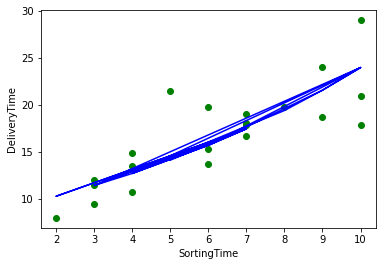

In [45]:
plt.scatter(x=dt['SortingTime'],y=dt['DeliveryTime'],color='green')
plt.plot(dt.SortingTime,pred3,color='blue')
plt.xlabel('SortingTime')
plt.ylabel('DeliveryTime')


Text(0, 0.5, 'Standardized Residual')

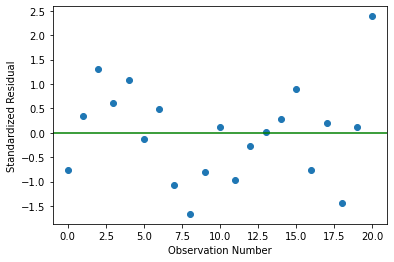

In [46]:
plt.plot(model3.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual')

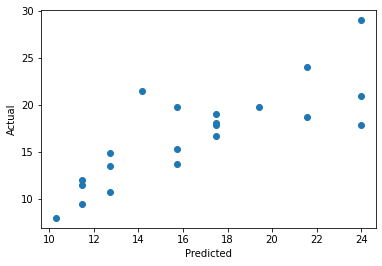

In [47]:
plt.scatter(x=pred3,y=dt.DeliveryTime)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [48]:
dt["SortingTime_Sq"] = dt.SortingTime*dt.SortingTime
dt 

,DeliveryTime,SortingTime,SortingTime_Sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100
5,15.35,6,36
6,19.00,7,49
7,9.50,3,9
8,17.90,10,100
9,18.75,9,81


In [49]:
# applying logerithmic transformation on dependent variable and quadratic transformation on independent variable
model_quad = smf.ols("np.log(DeliveryTime)~SortingTime+SortingTime_Sq",data=dt).fit()
model_quad.params

Intercept         1.699704
SortingTime       0.265922
SortingTime_Sq   -0.012841
dtype: float64

In [50]:
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.765
Model:                              OLS   Adj. R-squared:                  0.739
Method:                   Least Squares   F-statistic:                     29.28
Date:                  Fri, 21 Oct 2022   Prob (F-statistic):           2.20e-06
Time:                          00:52:58   Log-Likelihood:                 9.9597
No. Observations:                    21   AIC:                            -13.92
Df Residuals:                        18   BIC:                            -10.79
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.6997      0.228      7.441      0.000       1.220       2.180
SortingTime        0.2659      0.080      3.315      0.004       0.097       0.434
SortingTime_Sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
pred_quad = model_quad.predict(dt)
pred4=np.exp(pred_quad)  # as we have used log(AT) in preparing model so we need to convert it back
pred4


0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [52]:
rmse_quad = np.sqrt(np.mean((np.array(dt['DeliveryTime'])-np.array(pred4))**2))
rmse_quad 

2.7990419887409246

In [53]:
model_quad.resid

0    -0.030341
1     0.044747
2     0.150179
3     0.125141
4     0.292433
5    -0.101859
6     0.012471
7    -0.130613
8    -0.190063
9    -0.121719
10   -0.018085
11   -0.183037
12   -0.117758
13    0.060442
14    0.105499
15    0.142076
16   -0.211935
17   -0.035504
18   -0.100744
19   -0.051086
20    0.359754
dtype: float64

In [54]:
model_quad.resid_pearson

array([-0.18653701,  0.27510944,  0.92331151,  0.76937448,  1.79789238,
       -0.62623272,  0.0766711 , -0.80301506, -1.16851536, -0.74833548,
       -0.11118848, -1.12531927, -0.72398172,  0.37160353,  0.64861345,
        0.8734897 , -1.3029903 , -0.21828016, -0.61938087, -0.31407821,
        2.21178906])

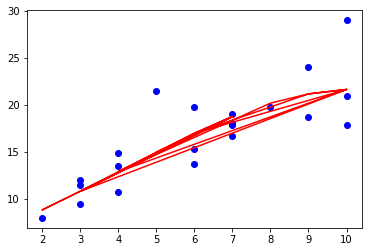

In [55]:
plt.scatter(dt.SortingTime,dt.DeliveryTime,c="b")
plt.plot(dt.SortingTime,pred4,"r")

Text(0, 0.5, 'Standardized Residual')

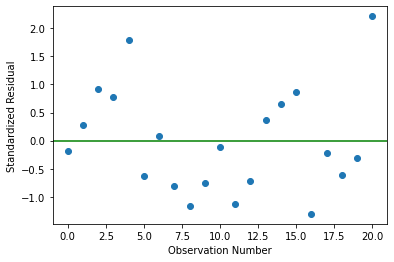

In [56]:
plt.plot(model_quad.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual")

(array([3., 5., 1., 4., 2., 2., 2., 0., 1., 1.]),
 array([-1.3029903 , -0.95151236, -0.60003442, -0.24855649,  0.10292145,
         0.45439938,  0.80587732,  1.15735525,  1.50883319,  1.86031113,
         2.21178906]),
 <BarContainer object of 10 artists>)

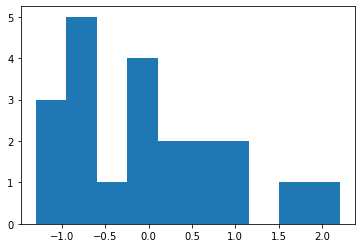

In [57]:
plt.hist(model_quad.resid_pearson)

In [58]:
data = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model_quad.rsquared])}
table=pd.DataFrame(data)
table

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,2.791650,0.682271
1,rmse_log,2.733171,0.695443
2,rmse_exp,2.940250,0.710948
3,rmse_quad,2.799042,0.764867


In [59]:
import matplotlib.pyplot as plt
plt.style.use('classic')

(array([3., 5., 1., 4., 2., 2., 2., 0., 1., 1.]),
 array([-1.3029903 , -0.95151236, -0.60003442, -0.24855649,  0.10292145,
         0.45439938,  0.80587732,  1.15735525,  1.50883319,  1.86031113,
         2.21178906]),
 <BarContainer object of 10 artists>)

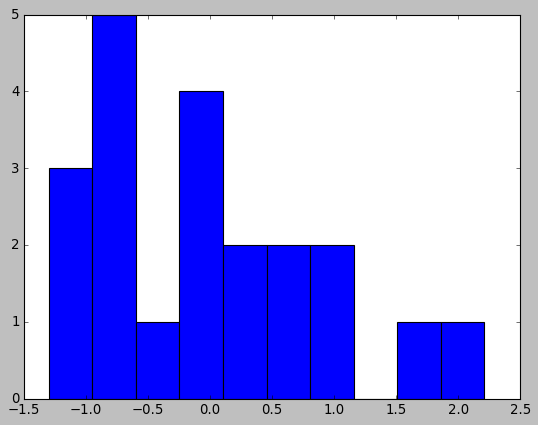

In [60]:
plt.hist(model_quad.resid_pearson)

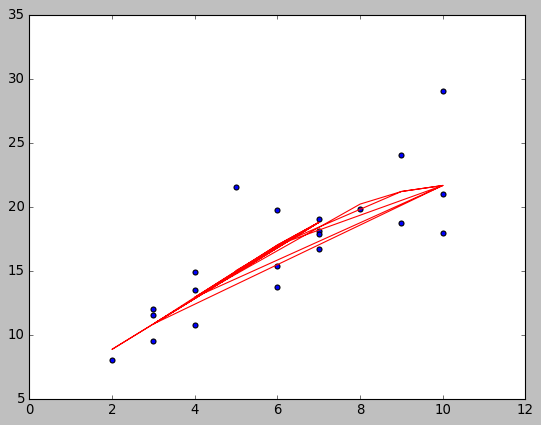

In [61]:
plt.scatter(dt.SortingTime,dt.DeliveryTime,c="b")
plt.plot(dt.SortingTime,pred4,"r")

In [62]:
# applying polynomial transformation
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)

In [63]:
X = dt[["SortingTime"]]
X

,SortingTime
0,10
1,4
2,6
3,9
4,10
5,6
6,7
7,3
8,10
9,9


In [64]:
Y = dt["DeliveryTime"]
Y

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: DeliveryTime, dtype: float64

In [65]:
poly_X = poly.fit_transform(X)

In [66]:
poly_X

array([[1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04,
        1.0000e+05],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02,
        1.0240e+03],
       [1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03,
        7.7760e+03],
       [1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02, 6.5610e+03,
        5.9049e+04],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04,
        1.0000e+05],
       [1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03,
        7.7760e+03],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03,
        1.6807e+04],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01,
        2.4300e+02],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04,
        1.0000e+05],
       [1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02, 6.5610e+03,
        5.9049e+04],
       [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02, 4.0960e+03,
        3.2768e+04],
       [1.0000e+00, 4

In [67]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(poly_X,Y)

LinearRegression()

In [68]:
model1.coef_

array([ 0.00000000e+00, -4.25939900e+01,  1.93975249e+01, -3.75577657e+00,
        3.31860303e-01, -1.09495013e-02])

In [69]:
model1.intercept_

40.91805904057049

In [70]:
y_pred1 = model1.predict(poly_X)

In [71]:
y_pred1

array([22.60698319, 14.2767453 , 17.3649072 , 21.58889448, 22.60698319,
       17.3649072 , 17.7758054 , 10.52780155, 22.60698319, 21.58889448,
       19.15667253, 14.2767453 , 17.7758054 , 10.52780155, 10.52780155,
       14.2767453 , 17.3649072 , 17.7758054 ,  8.23334694, 17.7758054 ,
       16.60965826])

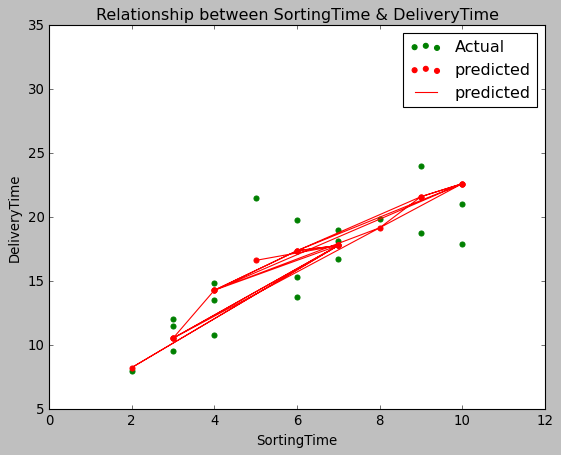

In [72]:
plt.scatter(dt["SortingTime"],dt["DeliveryTime"],color='green',label="Actual")
plt.scatter(dt["SortingTime"],y_pred1,color='red',label="predicted")

plt.plot(dt["SortingTime"],y_pred1,color='red',label="predicted")

plt.title("Relationship between SortingTime & DeliveryTime")
plt.xlabel("SortingTime")
plt.legend()
plt.ylabel("DeliveryTime")
plt.show()

In [73]:
from sklearn.metrics import r2_score, mean_squared_error
r2score=r2_score(Y,y_pred1)
r2score

0.7142294558346619

In [74]:
MSE=mean_squared_error(Y,y_pred1)
MSE

7.009439523818168

In [75]:
RMSE = np.sqrt(MSE)
RMSE

2.647534612392852

In [77]:
data = {"MODEL":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad","rmse_poly"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad,RMSE]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model_quad.rsquared,r2score])}
table=pd.DataFrame(data)
table

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,2.791650,0.682271
1,rmse_log,2.733171,0.695443
2,rmse_exp,2.940250,0.710948
3,rmse_quad,2.799042,0.764867
4,rmse_poly,2.647535,0.714229


In [78]:
# based on above model scores, 
# we can say combination of logerithmic and quadratic transformation on linear regression gives best results.

In [79]:
#New data for prediction
new_data=pd.DataFrame({'SortingTime': 9 , 'SortingTime_Sq': 81},index=[1])

pred_quad1 = model_quad.predict(new_data)
pred5=np.exp(pred_quad1)  # as we have used log(AT) in preparing model so we need to convert it back
pred5

1    21.176938
dtype: float64